Problem Statement:
According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. It is another health issue that has found to be rising throughout the world due to the adoption of lifestyle changes that disregards healthy lifestyle & good eating habits. Thus, new emerging electronic devices that record the health vitals have paved the way for creating an automated solution with AI techniques at it's core. Thus, similar to heart diseases, efforts have begun to create lab tests that predict stroke. The dataset presented here has many factors that highlight the lifestyle of the patients and hence gives us an opportunity to create an AI-based solution for it.

Aim:
To classify / predict whether a patient can suffer a stroke.
It is a binary classification problem with multiple numerical and categorical features.


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Datasets
stroke_data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
#Checking first five rows and columns
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#data info
stroke_data.shape

(5110, 12)

In [5]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
#checking number of missing values in dataset as there are 201 null values in bmi
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:

stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
#Missing value imputation

In [10]:

stroke_data['bmi'].fillna(value='0', inplace=True)

In [11]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
#checking data types
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                   object
smoking_status        object
stroke                 int64
dtype: object

C:\Users\Subodh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


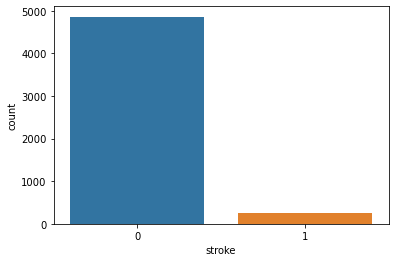

In [13]:

sns.countplot(stroke_data['stroke'], label="Count")
plt.show()

C:\Users\Subodh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


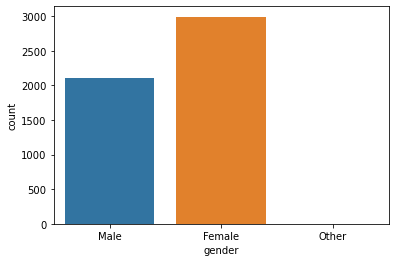

In [14]:
sns.countplot(stroke_data['gender'], label="Count")
plt.show()

C:\Users\Subodh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


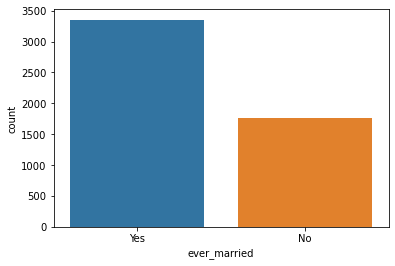

In [15]:
sns.countplot(stroke_data['ever_married'], label="Count")
plt.show()

C:\Users\Subodh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


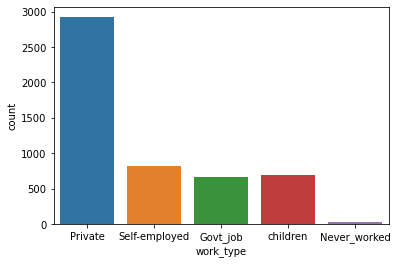

In [16]:
sns.countplot(stroke_data['work_type'], label="Count")
plt.show()

C:\Users\Subodh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


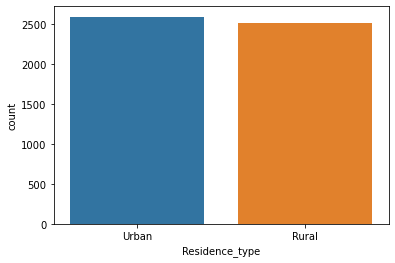

In [17]:
sns.countplot(stroke_data['Residence_type'], label="Count")
plt.show()

C:\Users\Subodh Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


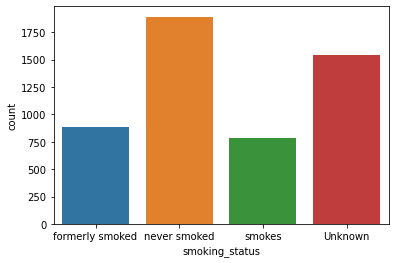

In [18]:
sns.countplot(stroke_data['smoking_status'], label="Count")
plt.show()

In [19]:
stroke_data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
stroke_data = stroke_data.drop('id', axis=1)

In [21]:
stroke_data.shape

(5110, 11)

In [22]:
#checking unique value of the features

In [23]:
stroke_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [24]:
stroke_data['hypertension'].unique()

array([0, 1], dtype=int64)

In [25]:
stroke_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [26]:
stroke_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [27]:
stroke_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
stroke_data['heart_disease'].unique()

array([1, 0], dtype=int64)

In [29]:
stroke_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [30]:
# Replacing binary categorical data
stroke_data['Residence_type']= stroke_data['Residence_type'].replace({'Urban': 0})
stroke_data['Residence_type']= stroke_data['Residence_type'].replace({'Rural': 1})

stroke_data['ever_married']= stroke_data['ever_married'].replace({'Yes': 0})
stroke_data['ever_married']= stroke_data['ever_married'].replace({'No': 1})


In [31]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,0,Private,0,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,0,Self-employed,1,202.21,0,never smoked,1
2,Male,80.0,0,1,0,Private,1,105.92,32.5,never smoked,1
3,Female,49.0,0,0,0,Private,0,171.23,34.4,smokes,1
4,Female,79.0,1,0,0,Self-employed,1,174.12,24.0,never smoked,1


In [32]:
#Replacing non-binary categorical with one-hot-encoding
stroke_data = pd.get_dummies(stroke_data,columns=['gender','work_type','smoking_status'])
stroke_data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,0,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,0,1,202.21,0,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,0,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,0,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,0,1,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0


Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

We have 2 options for data scaling :

1) Normalization

2) Standardization.

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

From the above transformation, we fit the data on the training data and transform the test data from information based on the training data. If we check the formulas of the Normalization & Standardization, we use mean, standard deviation, min & max values.

Thus if these above statistical parameters are calculated using the complete dataset, then we are sharing the values from the to-be test data and thus sharing this to-be test data with the training data and cause Data Leakage.

In [34]:

from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()

stroke_data[['age','avg_glucose_level','bmi']] = pd.DataFrame(scaler_s.fit_transform(
    stroke_data[['age','avg_glucose_level','bmi']]))
stroke_data.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,0,0,2.706375,0.928080,1,0,1,0,0,0,1,0,0,0,1,0,0
1,0.786070,0,0,0,1,2.121559,-2.913002,1,1,0,0,0,0,0,1,0,0,0,1,0
2,1.626390,0,1,0,1,-0.005028,0.497795,1,0,1,0,0,0,1,0,0,0,0,1,0
3,0.255342,0,0,0,0,1.437358,0.697195,1,1,0,0,0,0,1,0,0,0,0,0,1
4,1.582163,1,0,0,1,1.501184,-0.394260,1,1,0,0,0,0,0,1,0,0,0,1,0


In [35]:
# defining data or creating variable i.e x=independent variable and y = dependent variable.

In [36]:
X = stroke_data.drop(axis=1,columns=['stroke'])
y = stroke_data['stroke']
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,0,0,2.706375,0.928080,0,1,0,0,0,1,0,0,0,1,0,0
1,0.786070,0,0,0,1,2.121559,-2.913002,1,0,0,0,0,0,1,0,0,0,1,0
2,1.626390,0,1,0,1,-0.005028,0.497795,0,1,0,0,0,1,0,0,0,0,1,0
3,0.255342,0,0,0,0,1.437358,0.697195,1,0,0,0,0,1,0,0,0,0,0,1
4,1.582163,1,0,0,1,1.501184,-0.394260,1,0,0,0,0,0,1,0,0,0,1,0


In [37]:
# splitting the data into training and testing phase.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [39]:
# Model Building and testing accuracy of model

In [40]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, classification_report

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.73      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022

